**Instalación paquetes**

In [13]:

!pip -q install networkx matplotlib

**Importaciones paquetes**

In [14]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import colorsys, numpy as np, matplotlib.colors as mcolors

**Implementaciones**

In [15]:

def complete_k_partite(sizes):
    if not sizes or min(sizes) < 1:
        raise ValueError("Cada tamaño de parte debe ser ≥ 1")
    G = nx.complete_multipartite_graph(*sizes)
    parts, offset = [], 0
    for s in sizes:
        parts.append(list(range(offset, offset + s)))
        offset += s
    return G, parts


def distinct_colors(k):
    if k <= 20:
        cmap = get_cmap("tab20")
        return [cmap(i)[:3] for i in range(k)]
    else:
        golden = 0.61803398875
        h = 0.1
        cols = []
        for i in range(k):
            h = (h + golden) % 1.0
            s = 0.6 + 0.2 * ((-1) ** i)
            l = 0.55 if i % 3 else 0.75
            cols.append(colorsys.hls_to_rgb(h, l, s))
        return cols


def draw_k_partite(G, parts, *, seed=None, node_size=250,
                   edge_alpha=0.35, edge_color="black"):
    pos = nx.spring_layout(G, seed=seed, k=1/np.sqrt(G.number_of_nodes()))
    colors = distinct_colors(len(parts))

    plt.figure(figsize=(6.5, 6.5))
    for idx, nodes in enumerate(parts):
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=nodes,
            node_color=[colors[idx]],
            node_size=node_size,
            linewidths=1.5,
            edgecolors="white",
        )

    nx.draw_networkx_edges(G, pos,
                           alpha=edge_alpha,
                           width=1.1,
                           edge_color=edge_color)
    plt.title(f"Grafo completo {len(parts)}-pártito   {tuple(len(p) for p in parts)}",
              fontsize=14, pad=12)
    plt.axis("off")
    plt.show()


**Implementaciones**

/tmp/ipython-input-4190906601.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20")


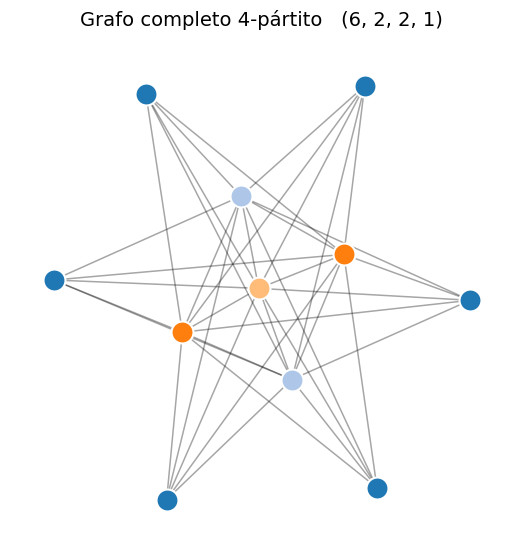

In [16]:

sizes = [6, 2,2,1]
G, parts = complete_k_partite(sizes)
draw_k_partite(G, parts, seed=123, node_size=250)